In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
images="/content/drive/MyDrive/dataset_processing_augmentation"

In [3]:
folders=os.listdir(images)
print(folders)

['positive', 'negative']


In [4]:
import cv2

image_data=[]
labels=[]

In [5]:
label_dict={
    'negative':0,
    'positive':1
}

In [6]:
from keras.preprocessing import image
try:

    for file in folders:
        try:

            path=os.path.join(images,file)
            print(path)
            for im in os.listdir(path):
                try:

                    img=image.load_img(os.path.join(path,im),target_size=((64,64)))
                    img_array=image.img_to_array(img)
                    image_data.append(img_array)
                    labels.append(label_dict[file])
                except:
                    print("Error for processing one image")

        except:
            print("Error in folder")
except:
    print("Done processing")



/content/drive/MyDrive/dataset_processing_augmentation/positive
/content/drive/MyDrive/dataset_processing_augmentation/negative


In [7]:
print(len(image_data),len(labels))

30798 30798


In [8]:
combined = list(zip(image_data,labels))
image_data[:],labels[:]=zip(*combined)

In [9]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
x_train=np.array(image_data)
y_train=np.array(labels)

print(x_train.shape,y_train.shape)

(30798, 64, 64, 3) (30798,)


In [11]:
from tensorflow.python.keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(30798, 64, 64, 3) (30798, 2)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=False,
    vertical_flip=False,
)
augment.fit(x_train)

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input


In [16]:
# input_shape = (64, 64, 3)

# # Define input layer
# input_layer = Input(shape=input_shape)

In [17]:
# model = MobileNet(include_top=False,weights= 'imagenet',input_shape = (64,64,3))
# # model = MobileNet(weights='imagenet', include_top=False,input_shape=(64,64,3))
# model = MobileNet(include_top=False, weights='imagenet', input_tensor=input_layer)
#base_model = MobileNet(weights='imagenet', include_top=False)
model = MobileNet(weights='imagenet', include_top=False)


17225924/17225924 [==============================] - 0s 0us/step


In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 

In [19]:
for num in range(len(model.layers)):
    print(num,model.layers[num])

0 <keras.src.engine.input_layer.InputLayer object at 0x7fbedab9ad70>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbeda6ddb40>
2 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeda6de2f0>
3 <keras.src.layers.activation.relu.ReLU object at 0x7fbeda6dece0>
4 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fbeda6df490>
5 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeda788be0>
6 <keras.src.layers.activation.relu.ReLU object at 0x7fbeda788f40>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7fbeda78a170>
8 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbeda78a320>
9 <keras.src.layers.activation.relu.ReLU object at 0x7fbeda78b7f0>
10 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fbeda78b250>
11 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fbeda7a8760>
12 <keras.sr

In [20]:
for layer in model.layers[:81]:
  layer.trainable=False
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 conv1 False
2 conv1_bn False
3 conv1_relu False
4 conv_dw_1 False
5 conv_dw_1_bn False
6 conv_dw_1_relu False
7 conv_pw_1 False
8 conv_pw_1_bn False
9 conv_pw_1_relu False
10 conv_pad_2 False
11 conv_dw_2 False
12 conv_dw_2_bn False
13 conv_dw_2_relu False
14 conv_pw_2 False
15 conv_pw_2_bn False
16 conv_pw_2_relu False
17 conv_dw_3 False
18 conv_dw_3_bn False
19 conv_dw_3_relu False
20 conv_pw_3 False
21 conv_pw_3_bn False
22 conv_pw_3_relu False
23 conv_pad_4 False
24 conv_dw_4 False
25 conv_dw_4_bn False
26 conv_dw_4_relu False
27 conv_pw_4 False
28 conv_pw_4_bn False
29 conv_pw_4_relu False
30 conv_dw_5 False
31 conv_dw_5_bn False
32 conv_dw_5_relu False
33 conv_pw_5 False
34 conv_pw_5_bn False
35 conv_pw_5_relu False
36 conv_pad_6 False
37 conv_dw_6 False
38 conv_dw_6_bn False
39 conv_dw_6_relu False
40 conv_pw_6 False
41 conv_pw_6_bn False
42 conv_pw_6_relu False
43 conv_dw_7 False
44 conv_dw_7_bn False
45 conv_dw_7_relu False
46 conv_pw_7 False
47 conv_pw_7_bn 

In [21]:
# av1=Flatten()(model.output)
# fc1=Dense(256,activation='relu',kernel_regularizer=l2(0.01),input_dim=256)(av1)
# d1=Dropout(0.5)(fc1)
# fc2=Dense(128,activation='relu',kernel_regularizer=l2(0.01),input_dim=128)(d1)
# d2=Dropout(0.5)(fc2)
# fc3=Dense(2,activation='sigmoid')(d2)


# model_mobilenet=Model(model.input,fc3)
# model_mobilenet.summary()


In [22]:
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
d1=Dropout(0.5)(x)
fc2=Dense(128,activation='relu',kernel_regularizer=l2(0.01),input_dim=128)(d1)
d2=Dropout(0.5)(fc2)
predictions = Dense(2, activation='sigmoid')(d2)



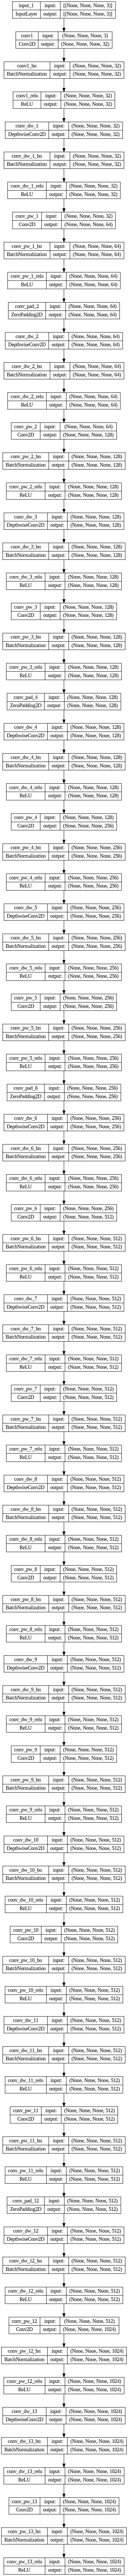

In [23]:
tf.keras.utils.plot_model(model,'model1.png',show_shapes=True)

In [24]:
model_M = Model(inputs=model.input, outputs=predictions)

# Compile the model
model_M.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model_M.fit(x_train, y_train,
                          shuffle=True,
                          batch_size=32,
                          epochs=20,
                          validation_split=0.20)

Epoch 1/20
770/770 [==============================] - 311s 399ms/step - loss: 1.0819 - accuracy: 0.7362 - val_loss: 4.7062 - val_accuracy: 0.0263
Epoch 2/20
770/770 [==============================] - 297s 386ms/step - loss: 0.4434 - accuracy: 0.8100 - val_loss: 5.6163 - val_accuracy: 0.0255
Epoch 3/20
770/770 [==============================] - 282s 367ms/step - loss: 0.3477 - accuracy: 0.8411 - val_loss: 8.4602 - val_accuracy: 0.0305
Epoch 4/20
770/770 [==============================] - 283s 368ms/step - loss: 0.3087 - accuracy: 0.8615 - val_loss: 8.1969 - val_accuracy: 0.0744
Epoch 5/20
770/770 [==============================] - 282s 366ms/step - loss: 0.2733 - accuracy: 0.8771 - val_loss: 6.2450 - val_accuracy: 0.1148
Epoch 6/20
770/770 [==============================] - 309s 401ms/step - loss: 0.2489 - accuracy: 0.8909 - val_loss: 7.5644 - val_accuracy: 0.0677
Epoch 7/20
770/770 [==============================] - 332s 431ms/step - loss: 0.2212 - accuracy: 0.9060 - val_loss: 15.5671 

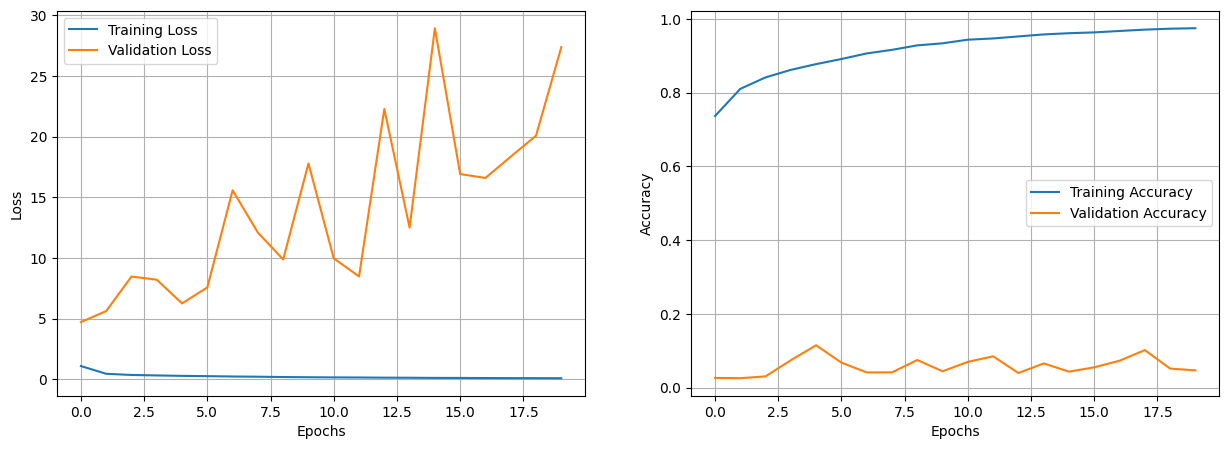

In [25]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.grid(True)
plt.legend()

In [26]:
# model_M.trainable=True
# for i,layer in enumerate(model_M.layers):
#   print(i,layer.name,layer.trainable)


In [27]:
model_M.save('Parkinson_Detection_Mobilenet.keras')



# test_steps = test_generator.samples // BATCH_SIZE
# loss, accuracy = model.evaluate(test_generator, steps=test_steps)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

In [28]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image

In [29]:
model = load_model('Parkinson_Detection_Mobilenet.keras')

In [30]:
test_images=r'/content/drive/MyDrive/Validation_Dataset'

test_image_data=[]
test_labels=[]

test_folders=os.listdir(test_images)
print(test_folders)

label_dict={
    'positive':1,
    'negative':0
}

from keras.preprocessing import image

for file in test_folders:
  path=os.path.join(test_images,file)
  for file1 in os.listdir(path):
    img=image.load_img(os.path.join(path,file1),target_size=((64,64)))
    img_array=image.img_to_array(img)
    test_image_data.append(img_array)
    test_labels.append(label_dict[file])

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:]=zip(*combined)


print(test_labels)
x_test=np.array(test_image_data)
y_test=np.array(test_labels)




# hist=model.fit(x_train,y_train,
#                         shuffle=True,
#                         batch_size=32,
#                         epochs=1,
#                         validation_split=0.10)

['positive', 'negative']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [31]:
predictions = model.predict(x_test,batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)

52/52 [==============================] - 5s 92ms/step


In [32]:
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 48.70%


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,predicted_labels))
print(confusion_matrix(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57       940
           1       0.39      0.35      0.37       715

    accuracy                           0.49      1655
   macro avg       0.47      0.47      0.47      1655
weighted avg       0.48      0.49      0.48      1655

[[556 384]
 [465 250]]
